<a href="https://colab.research.google.com/github/raohxxx/challenge-store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)
tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
tiendas=[tienda1,tienda2,tienda3,tienda4]
ventas=[]
for tiendax in tiendas:

  ventas.append(float(tiendax['Precio'].sum()))

Faturacion=list(zip(['tienda1','tienda2','tienda3','tienda4'],ventas))
Faturacion


[('tienda1', 1150880400.0),
 ('tienda2', 1116343500.0),
 ('tienda3', 1098019600.0),
 ('tienda4', 1038375700.0)]

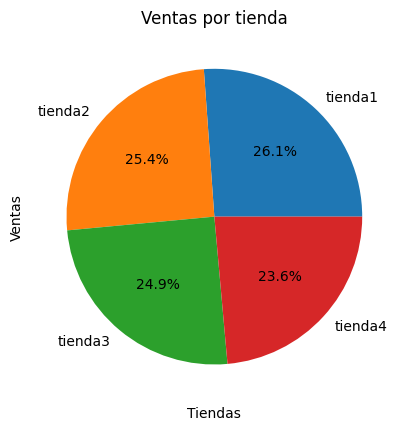

In [3]:
import matplotlib.pyplot as plt
#plt.bar(['tienda','tienda2','tienda3','tienda4'],ventas)
plt.title('Ventas por tienda')
plt.xlabel('Tiendas')
plt.ylabel('Ventas')
plt.pie( ventas,labels=['tienda1','tienda2','tienda3','tienda4'],autopct='%1.1f%%')

plt.show()


# 2. Ventas por categoría

In [36]:
ventas1=tienda1['Categoría del Producto'].value_counts()
ventas2=tienda2['Categoría del Producto'].value_counts()
ventas3=tienda3['Categoría del Producto'].value_counts()
ventas4=tienda4['Categoría del Producto'].value_counts()

consolidado = pd.concat([ventas1, ventas2, ventas3, ventas4], axis=1)
consolidado.columns = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
consolidado

,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Muebles,465,442,499,480
Electrónicos,448,422,451,451
Juguetes,324,313,315,338
Electrodomésticos,312,305,278,254
Deportes y diversión,284,275,277,277
Instrumentos musicales,182,224,177,170
Libros,173,197,185,187
Artículos para el hogar,171,181,177,201


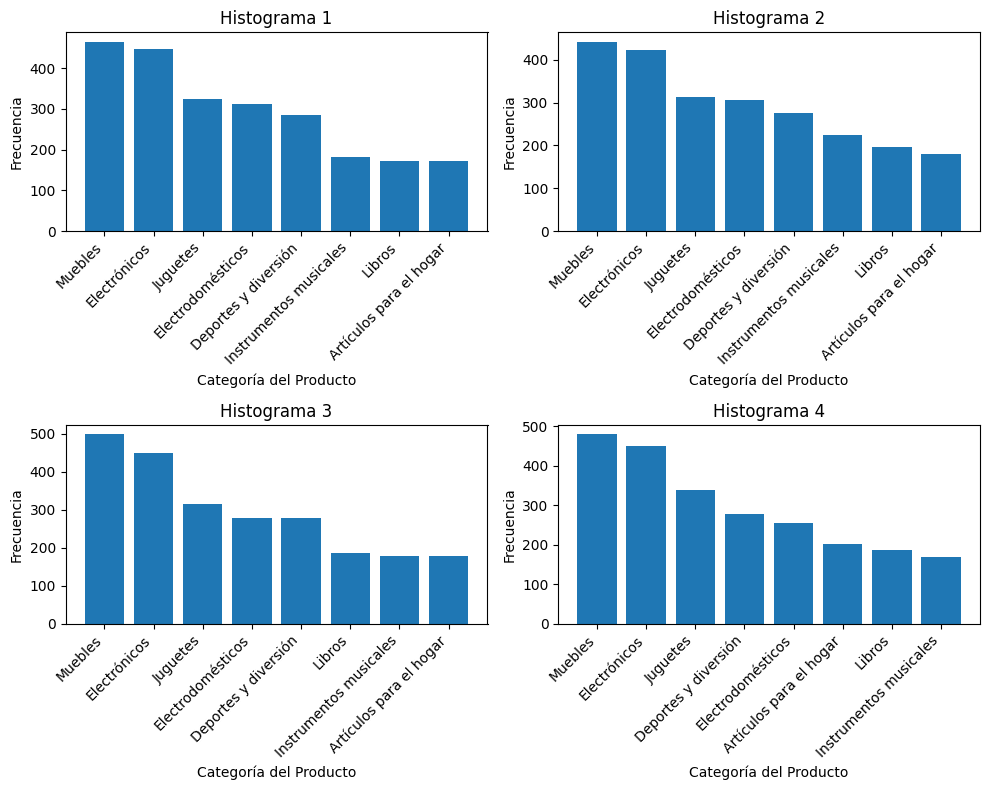

In [11]:

data = [tienda1['Categoría del Producto'], tienda2['Categoría del Producto'],
        tienda3['Categoría del Producto'], tienda4['Categoría del Producto']]

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for i, ax in enumerate(axs.flatten()):
    # Calcula la frecuencia de cada categoría y ordénala
    category_counts = data[i].value_counts().sort_values(ascending=False)

    # Obtén las categorías y sus frecuencias ordenadas
    categories = category_counts.index
    frequencies = category_counts.values

    # Crea el histograma con las categorías ordenadas
    ax.bar(categories, frequencies)  # Usa bar en lugar de hist para un mejor control

    ax.set_title(f'Histograma {i+1}')
    ax.set_xlabel('Categoría del Producto')
    ax.set_ylabel('Frecuencia')
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()




# 3. Calificación promedio de la tienda


In [18]:
Promedio_calificacion=[]

for tiendax in tiendas:
  #print(float(tiendax['Calificación'].mean()))
  Promedio_calificacion.append(round(float(tiendax['Calificación'].mean()),4))

Promedio_calificacion
#float(tienda1['Calificación'].mean())
list(zip(['tienda1','tienda2','tienda3','tienda4'],Promedio_calificacion))

[('tienda1', 3.9767),
 ('tienda2', 4.0373),
 ('tienda3', 4.0483),
 ('tienda4', 3.9958)]

# 4. Productos más y menos vendidos

In [48]:
producto1=tienda1['Producto'].value_counts()
producto2=tienda2['Producto'].value_counts()
producto3=tienda3['Producto'].value_counts()
producto4=tienda4['Producto'].value_counts()

consolidado2 = pd.concat([producto1, producto2, producto3, producto4], axis=1)
consolidado2.columns = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
#print(consolidado2)
#consolidado2['Tienda 1'].idxmax()
valor_maximo=consolidado2['Tienda 1'].max()
filas_maximas = consolidado2[consolidado2['Tienda 1'] == valor_maximo]
indices_maximos = filas_maximas.index.tolist()
print(f' el producto mas vendido de la tienda es o son:  {indices_maximos}')
valor_minimo=consolidado2['Tienda 3'].min()
filas_minimas = consolidado2[consolidado2['Tienda 1'] == valor_minimo]
indices_minimos = filas_minimas.index.tolist()
print(f' el producto menos vendido de la tienda es o son:  {indices_minimos}')

 el producto mas vendido de la tienda es o son:  ['Microondas', 'TV LED UHD 4K', 'Armario']
 el producto menos vendido de la tienda es o son:  ['Olla de presión']


# 5. Envío promedio por tienda

In [8]:
Promedio_envio=[]

for tiendax in tiendas:
  Promedio_envio.append(round(float(tiendax['Costo de envío'].mean()),2))
Promedio_envio

promedio_envio_por_tienda=list(zip(['tienda1','tienda2','tienda3','tienda4'],Promedio_envio))
promedio_envio_por_tienda

[('tienda1', 26018.61),
 ('tienda2', 25216.24),
 ('tienda3', 24805.68),
 ('tienda4', 23459.46)]

<BarContainer object of 4 artists>

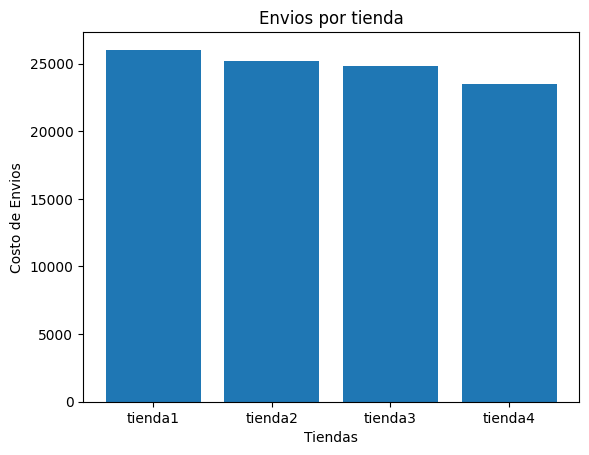

In [9]:
plt.title('Envios por tienda')
plt.xlabel('Tiendas')
plt.ylabel('Costo de Envios')
etiquetas=[x[0] for x in promedio_envio_por_tienda]
valores=[x[1] for x in promedio_envio_por_tienda]
plt.bar(etiquetas,valores)

# Costo total de envio por tienda


In [10]:
Total_envio=[]

for tiendax in tiendas:
  Total_envio.append(round(float(tiendax['Costo de envío'].sum()),2))
Total_envio

Total_envio_por_tienda=list(zip(['tienda1','tienda2','tienda3','tienda4'],Total_envio))
Total_envio_por_tienda

[('tienda1', 61377900.0),
 ('tienda2', 59485100.0),
 ('tienda3', 58516600.0),
 ('tienda4', 55317400.0)]